# SDA: Assignment 2

**Name**: Job Stouthart

**Student ID**: 13999788

# Introduction
In the previous assignment you have performed some statistical hypothesis testing by assuming that the data follows a normal distribution. Assuming a model (distribution) is called a ‘parametric’ approach. Although the normal distribution is quite a common distribution, other and very different distributions also occur in real data. What’s more, sometimes it is desirable to do so-called ‘non-parametric’ inference where no particular model is assumed from which the data (or statistics) would be sampled from.

In this assignment you will:
1. Generate data samples from different distributions;
2. Study the p-value and its relation to confidence intervals;
3. Calculate confidence intervals using a resampling technique;
4. Study the appropriateness of resampling for different sample sizes;
5. Compare the confidence interval with the known truth from the generating models;
6. Determine if two data samples come from the same distribution using a permutation test.

## Coding and References
You should use the Python programming language for all programming tasks. You should use native Python code for all tasks unless otherwise instructed. Whenever you have already implemented a particular function before by yourself, from that point onward you are allowed to use the more efficient implementation from a package. So for instance, if you have already implemented yourself the `mean()` function and have used it at least once in an answer then you are allowed to use the `np.mean()` function from numpy.

The exceptions are:
1. the logarithm function, which you may find in the packages `math` or `numpy`.
2. the square root function √x, which can be computed using `x**0.5`.
Further Exception (only week 4): the use of vectors and matrices (`numpy.array`) is additionally allowed in week 4's assignment. (Essentially I assume that you know how to implement multidimensional arrays by nesting lists, so no need to show that explicitly.) Still, before you use the `np.dot` function from numpy, for instance, implement it yourself first to show that you know what it does exactly. Also for clustering, such as k-means clustering: implement it yourself first and use it at least once to show that it works. If needed for performance reasons you can subsequently use the implementation from the `sklearn` package, for example.  

For some questions you may have to look up certain facts, formulas, equations, or freshen up your knowledge. The problems in the assignments do not always refer to pertinent sources; you are expected to research into missing knowledge yourself. 
For refreshers of the very basics of probability theory, or additional resources behind statistical concepts introduced here, please look on Canvas for the resources provided.

Please do not ever copy (parts of) your answer or code from any other source, be it online or from fellow students. You can help each other understand the problem and to compare outcomes, but not copy answers.

## Submission
Please upload your answers to all questions in Jupyter Notebook format (.ipynb extension) through the appropriate Canvas page no later than Sunday, November 10th, 2024 at 23:59. Your answers and derivations should be included inline in your Jupyter Notebook file (do not remove any output before saving the file). Be sure to make every step explicit and clearly identifiable (computational performance or code brevity are not graded). Submissions by e-mail or past this deadline will not be considered.
Deadline extension requests will not be considered unless they are mediated through a study advisor.

## Grading
You can earn a maximum of 140 points. In case you do not submit both your answers and code by the deadline then you receive an “NA”. If you submit your answers and code but score 0 points then your grade will be a 1 (Dutch grading system). Scoring all 140 points means your grade becomes a 10. An amount of bonus points can be earned which is added to your score to a maximum of 140. That is, each week you can earn a maximum grade of 10 and it is not possible to transfer (bonus) points from one assignment to another.

Each of the weekly assignments will have a relative weight proportional to the maximum number of points. In total they make up 50% of your final grade.

In [1]:
import matplotlib.pyplot as plt

from scipy.special import erf, erfinv

import numpy as np

**LINK TO PRELIMINARY MATERIAL FOR THE COURSE** https://www.overleaf.com/read/tygcjfmjjpss
 Here you can find a pdf, which is continuous update, to download.

## Problem 1

In the previous assignment you have programmed an RNG for the normal distribution. In this assignment
you will need an RNG for the log-normal distribution. In this problem you will program an RNG for the
log-normal distribution as well as a function to find any percentile of a data sample.

### 1.1
Program an RNG function `randlognorm(mu, sigma)` for any given log-normal distribution. Although you could do this again using the inverse-sampling transform approach, there is also a clever
option. Both are fine. Please use the following definition and parameterization of a log-normally
distributed $X$:

$$X \text{ ~ } e^{N(\mu, \sigma)}.$$

[4 points]

In [2]:
# Seed and custom RNG using a linear congruential generator
seed = 69

def randint(a=1664525, c=1013904223, m=2**32):
    global seed
    seed = (a * seed + c) % m
    return seed

def rand():
    return randint() / 2**32

def randnorm(mu, sigma):
    return mu + sigma*(2**0.5)*erfinv(2*rand()-1)

def randlognorm(mu, sigma):
    return np.exp(randnorm(mu, sigma))


### 1.2
In words, the $\alpha$-percentile of a distribution (or data sample) is defined as the value $x_\alpha$ such that a fraction $a$ of the values in the data sample are smaller than $x$ and thus that a fraction $1 − \alpha$ of the
sample is equal or greater than $x$. Use this definition to program a function `percentile(values,alpha)` where values is expected to be a list of samples, so your dataset, and $0 \leq \alpha \leq 1$.

[3 points]

In [3]:
def percentile(values, alpha):
    values.sort()
    length = alpha * (len(values) -1)
    lower = int(length)
    # Lower value ios not a int most of the time so we need to interpolate
    upper = lower + 1

    if upper > len(values) - 1:
        return values[-1]
    
    lower_val = values[lower]
    upper_val = values[upper]

    # linear interpolation between the two points
    return lower_val + ((upper_val - lower_val)/ (upper - lower)) * (length - lower)

values = [1, 4, 5]
print("Percentile of 0.95: ", percentile(values, 0.95))

Percentile of 0.95:  4.9


### 1.3
Add a linear interpolation step to the `percentile(values, alpha)` function such that the 0.95 percentile of the numbers {1, 4, 5} is about 4.9<sup>1</sup>. Show that your function indeed returns 4.9 for this (tiny) example.

<span style="font-family:Arial; font-size: 0.8em;">Note 1: Adding this linear interpolation is non-essential for the rest of the assignment and may take a bit of tinkering to get it right, so you might also decide to skip this step for now and return to it later.</span>

[2 points]

See code box above for the code and output.

### 1.4
Pick parameter values for a log-normal distribution to be used in the rest of this problem; a suggestion
is $\mu = 0.$, $\sigma = 0.3$. Plot a histogram of a data sample of exactly $10^5$ values and overlay the theoretical PDF on top<sup>2</sup>. Indicate the values of the three quartiles of the data sample on the x-axis.

<span style="font-family:Arial; font-size: 0.8em;">Note 2: Repeatedly calling hist(), plot(), or similar functions before a show() call will overlay the plots in a single panel.</span>

[4 points]

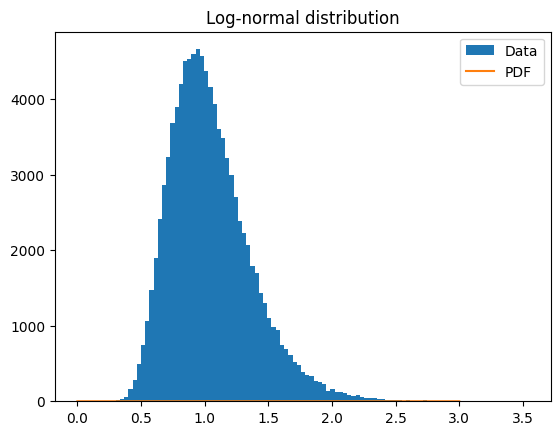

In [4]:
MU = 0
SIGMA = 0.3

def PDF(x):
    return (1/(x*SIGMA*np.sqrt(2*np.pi))) * np.exp(-((np.log(x)-MU)**2)/(2*SIGMA**2))

VALS = [randlognorm(MU, SIGMA) for _ in range(10**5)]
count, bins, _ = plt.hist(VALS, 100, label="Data")
x = np.linspace(0.0001, 3, 1000)
plt.plot(x, [PDF(x) for x in x], label="PDF")
plt.title("Log-normal distribution")
plt.legend()
plt.show()

### 1.5

What is the numerical value of the 0.75-percentile from the theoretical distribution? One acceptable way to find this is to plot the theoretical (exact) CDF of the log-normal distribution and then plot the horizontal line $y = 0.75$ on top of it. Then read off the appropriate value by visual inspection. Convince yourself that this is correct.

What should be the probability that a single random value from your log-normal RNG is less than this
percentile?

[3 points]

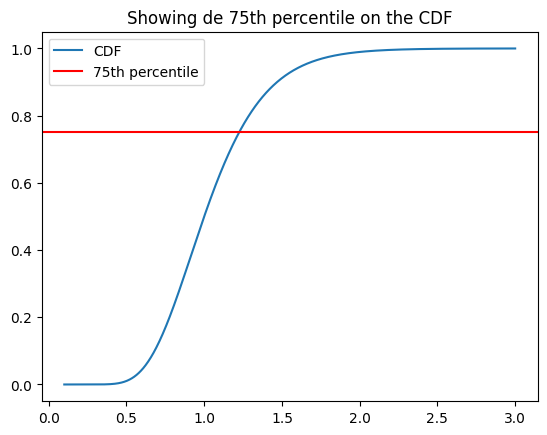

In [5]:
def CDF(x):
    return 0.5*(1+erf((np.log(x)-MU)/(SIGMA*np.sqrt(2))))
x = np.linspace(0.1, 3, 1000)
plt.plot(x , [CDF(x) for x in x], label="CDF")
plt.axhline(0.75, color='red', label="75th percentile")
plt.title("Showing de 75th percentile on the CDF")
plt.legend()
plt.show()

### 1.6

Let us say that we do not want to assume that the RNG indeed follows the log-normal distribution. (Even though of course we know that it does, by construction.) That is, we do have access to the ‘generating model’ (your RNG) and can obtain experimental values from it, but we do not know how
this model actually works and thus treat it as a black box from which we can only observe new sample values.

Test the value of the theoretical 0.75-percentile (above) of your RNG non-parametrically by generating (‘observing’) at least $10^4$ data samples with exactly $10^3$ values each. Compute the 0.75-percentile for each sample (giving you thus at least $10^4$ percentile values) and then compute the empirical 95% confidence interval of this statistic (two-sided) based on these $10^4$ computed percentiles. Show a histogram of the 0.75-percentile values and indicate also the confidence interval you just computed.
Compare with the theoretical value<sup>3</sup> and draw a valid conclusion from this. Specify in particular what you may or not may conclude from the your test.

<span style="font-family:Arial; font-size: 0.8em;">Note 3: For completeness of the non-parametric setting we should also assume that the theoretical value was obtained non-parametrically, for instance by sampling from a different RNG. We will see such a setting later in the assignment.</span>

[5 points]

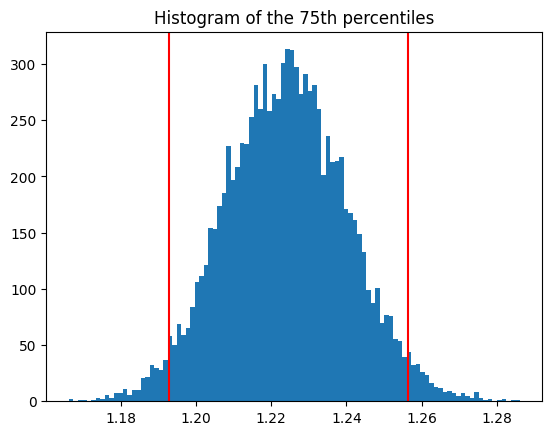

Confidence interval:  1.2240330449100012  +/-  [np.float64(1.256408182115105), np.float64(1.192802595759342)]


In [ ]:
def simulate():
    values =[]
    for _ in range(10**4):
        values.append([randlognorm(MU, SIGMA) for _ in range(10**3)])
    return values
    
values = simulate()

percentiles = [percentile(v, 0.75) for v in values]

# confidence_interval = 1.960 * (np.std(percentiles))
confidence_interval = [percentile(percentiles, 0.975), percentile(percentiles, 0.025)]

plt.hist(percentiles, 100)
plt.title("Histogram of the 75th percentiles")
plt.axvline(confidence_interval[0], color='red', label="Mean + conf")
plt.axvline(confidence_interval[1], color='red', label="Mean - conf")
plt.show()

confidence = [confidence_interval[1], confidence_interval[0]]
print("Confidence interval: ", np.mean(percentiles), " +/- ", confidence_interval)

### 1.7

Suppose that you draw another single data sample with the same number of values as before (so containing $10^3$ values) and using the same parameters for the log-normal distribution. Suppose you calculate the 0.75-percentile of this sample. Let us again pretend for the moment that we are uncertain (forgot) which RNG was used to generate this one sample. Let us call this percentile value $x$.

Let us first hypothesize ($H_0$) that $x$ was computed from a sample generated indeed using your log-normal RNG (which is correct, but we forgot this). What should be the probability that $x$ lies outside
the CI reported before (question 6), under this hypothesis? Consequently, again assuming that $x$ would indeed have been generated by your log-normal RNG, what is the probability that you would wrongly
reject this hypothesis?

[3 points]

This is 1 - 0.95 as this is the confidence interval we chose making it 0.05.

### 1.8

Now let us suppose that the data sample was not generated by the log-normal RNG (alternative hypothesis $H_1$). Can we now (assuming $H_1$ is true) in general still make a valid statement about the
expected probability that $x$ falls inside or outside the CI of the generating model<sup>4</sup>? If not then why not? If yes then explain briefly how you would go about it.

<span style="font-family:Arial; font-size: 0.8em;">Note 4: **Hint:** think about how you would practically go about this: starting up your Python, how would you generate new random samples $x'$ under $H_1$, just as $x$ was generated, to calculate this probability?</span>

[3 points]

NO you cant say anything of value.

### 1.9

Suppose that the only possible alternative RNG is actually an RNG for the normal distribution which you programmed in the previous assignment. Since we already supposed that it was not the log-normal distribution (which is $H_0$), let us now suppose that it was then in fact a normal RNG.

Fit<sup>5</sup> a normal distribution to the data sample and report its mean and standard deviation. Now that you have these two parameter values, state an appropriate and exact $H_1$ alternative hypothesis.
Generate at least $10^4$ values for its 0.75-percentile (using the same number of values per sample as above to estimate each individual percentile value, such as under question 6). Estimate the probability
that the 0.75-percentile of a single data sample (of $10^3$ size) from this normal RNG happens to lie in
the CI calculated above (under question 6)<sup>6</sup>.

<span style="font-family:Arial; font-size: 0.8em;">Note 5: This is a simple procedure especially for the normal distribution, see for instance http://wiki.analytica.com/index.php?title=How_to_Fit_a_Distribution_to_Data</span>

<span style="font-family:Arial; font-size: 0.8em;">Note 6: The average correct answer here is around 0.3, however you may observe some significant variability of this number as
you repeat the procedure. This is mainly due to the fitting of the normal distribution to a small sample of only $10^3$ values; if
you want a more stable resuly you could fit the normal distribution more accurately using a larger sample size such as $10^6$ (but keep using $10^3$ for
the rest of the assignment).</span>

[5 points]

**FAIL-SAFE HELP:** If you haven't been able to build the normal and log-normal generator, you may use the following functions from the numpy library in answering the next questions. If on the contrary you have built your own generators, use yours.

In [7]:
#fail safe 
from numpy.random import normal, lognormal

#draw a gaussian variable with mean 0.1 and sigma 0.25
print(normal(loc=0.1, scale=0.25))

#draw a lognormal variable with mean 0.1 and sigma 0.25 for its underlying normal distribution,
#i.e. : mean and sigma refer to the normal distribution
print(lognormal(mean=0.0, sigma=1.0))


-0.2871657833803256
2.8037575242458344


In [44]:
# YOUR CODE HERE

def mean(values):
    return sum(values) / len(values)

def std(values):
    m = mean(values)
    return (sum([(x - m)**2 for x in values]) / len(values))**0.5

mu = np.mean(VALS)
sigma = np.std(VALS)


def simulate(mu, sigma):
    values =[]
    for _ in range(10**4):
        values.append([randnorm(mu, sigma) for _ in range(10**3)])
    return values
    
values = simulate(mu, sigma)

percent = [percentile(v, 0.75) for v in values]
# for p in percent:
#     if p > confidence[0] and p < confidence[1]:
#         ans += 1
ans = sum([p for p in percent if p > confidence[0] and p < confidence[1]])/len(percent)

print(ans)

0.3490409221286759


### 1.10

Now you have enough information to fill in the following 2-by-2 table (confusion matrix). For the null-hypothesis $H_0$, take: “The sample is drawn from the log-normal distribution (with above parameters)”.
For the sake of argument assume that the probability of the null-hypothesis being actually true<sup>7</sup> is $p(H_0) = 0.5$, i.e., there is no a priori preference. We attempt to reject this hypothesis solely on the

|            |  $x$ in CI | $\neg$(x in CI) |
| ---------- | ---------- | --------------- |
| $H_0$      | 1-$\alpha$ | $\alpha$        |
| $\neg H_0$ | $\beta$    | $1 - \beta$     |


basis of the observed 0.75-percentile<sup>8</sup> being implausible or not. Calculate and report the values for $\alpha$ and $\beta$. Give a correct interpretation for $\beta$ in one sentence. Then calculate the total probability of making a ‘wrong’ conclusion at the 95% confidence level, specifying of course also the formula you used to calculate this.

<span style="font-family:Arial; font-size: 0.8em;">Note 7: Be careful about the interpretation here. You as a statistician cannot observe the real underlying distribution of your samples, thus you cannot observe whether it was $H_0$ or $H_1$ which actually generated your sample. But one of the two hypotheses must be true. The question is eventually whether you will (correctly) reject $H_0$ or not, given whether $H_0$ or $H_1$ is actually true. Your statistical conclusion has of course no effect on reality.</span>

<span style="font-family:Arial; font-size: 0.8em;">Note 8: This is definitely not the best test statistic to test such hypotheses; it merely serves as an accessible example, since the
necessary function for this you have already implemented just now in a previous question. The choice of better or worse statistics
will be touched upon in a later question.</span>

[6 points]

BETA = 0.3 is the calcluated chance the values of the randnorm val in the 75 percentile of a randlognorm. And it gives the chance the sample is not made with a randlognorm but does fall withing the CI
ALPHA = 0.05,


'!!!!

YOUR ANSWER HERE

### 1.11 

What is the probability of making a wrong conclusion if instead we focused on the 0.5-percentile (i.e., the median)? Redo the previous calculations to find this total probability of a wrong conclusion. (This should be significantly lower but again the noisy estimation of the gaussian may be tricky, so you may want to use more samples to estimate just the gaussian as suggested in note 6.) Compare with the previously found probability to explain the importance of the choice of statistic to try to reject a hypothesis.

[10 points]

In [45]:
mu = np.mean(VALS)
sigma = np.std(VALS)

values = simulate(mu, sigma)

percent = [percentile(v, 0.5) for v in values]
ans = sum([p for p in percent if p > confidence[0] and p < confidence[1]])/len(percent)

print(ans)

0.0


### 1.12

As you can see, testing hypotheses by means of CIs (parametric and non-parametric) is not without its caveats and snake pits. It is important to keep the exact interpretation in mind of the CI and hypothesis testing, and to choose the appropriate test statistic carefully.

Anyway, an equivalent way to test hypotheses is using p-values. The definition of the p-value of an observed statistic $x$ is: “assuming that the null-hypothesis $H_0$ is true, the probability that value $x$ or a more ‘extreme’ value would be observed.” A definition of ‘extreme’ is needed. In our current context, $x$ is an observation and a larger absolute difference between $x$ and its expected value (under $H_0$) is
typically considered ‘more extreme’. This is the two-sided definition; there is also a one-sided definition (so only in one direction) which is less common but still important.

Please show as clearly as possible that a p-value test with significance level $\alpha$ (e.g., 0.05) is exactly equivalent to a CI test with significance level $1 − \alpha$. You may also use plots or drawings of your own making.

[8 points]

In [10]:
# YOUR CODE HERE

### 1.13

Find a way to estimate the p-value (two-sided) of your $x$ test-statistic value for both $H_0$ and $H_1$ (log-normal and normal RNG). Report your method and the two values.

[6 points]

In [11]:
# YOUR CODE HERE

## Problem 2

In the previous week’s assignment you have estimated CIs in a parametric way, i.e., you assumed that a normal distribution generated the data. In the previous problem in the current assignment you have seen a
glimpse of non-parametric methods to estimate the CI of the sample percentile of a data sample. Nevertheless you were still in a luxury position: you had access to the (hypothesized) ‘model’ (RNG) which (potentially) generated the data, so you could generate many (at least $10^4$) such datasets and estimate the CI directly. This illustrates the power of having a mathematical or computational model of a real-world phenomenon, provided that this model is validated of course.

In this problem the situation starts to be more realistic to the beginning of a scientific research study. You will have access only to a single data sample and you will not have access to a model (nor are we willing to
assume one). You will estimate the CI of the population mean as this is one of the most common tasks in statistical inference, however the same technique applies to any statistic you could think of. To be able to compare your non-parametric estimates with a known truth you will generate a dataset yourself – and then pretend you do not know what distribution was used to generate it.

### 2.1

A simple way to draw ‘new’ data samples from an existing data sample of size N is through drawing N independent values from the existing sample with replacement. This is called the 'bootstrap' method (also referred to as 'resampling') and many variations exist.

Explain in your own words how, in the limit of large (infinite) sample size, drawing a single value from this sample becomes a close approximation (equal) to drawing a sample value from the theoretical
underlying distribution. Also explain briefly how then a statistical test becomes equivalent in both situations. You may draw a diagram or plot a graph in support of your explanation.

[8 points]

YOUR ANSWER HERE

### 2.2

Explain briefly why it is important to draw samples _with replacement_ in the bootstrap technique.

[3 points]

YOUR ANSWER HERE

### 2.3

Now generate $n = 10^2$ values from the log-normal distribution 
$X \text{~} e^{N (\mu, \sigma)}$ with $\mu = 0$, $\sigma= 1$. <sup>9</sup>
This will be your dataset for this problem, let us call it $\vec{x}$ .

Generate at least $N = 10^5$ sample means, one per sample of $n$ values each, from the theoretical distribution. Do the same by bootstrapping, so resampling from your dataset $\vec{x}$ . Plot the two histograms of
sample means and indicate both confidence intervals in the same plot. Finally, fit a normal distribution to this so-called test-statistic distribution from the bootstrap procedure and plot it as a line graph in
the same figure. It should fit relatively well.

<span style="font-family:Arial; font-size: 0.8em;">Note 9: A word on notation just to be clear. Capital letters indicate stochastic variables; lower-case roman letters indicate actual values or vectors of values (samples). Greek letters indicate parameter values.</span>

[7 points]

In [12]:
# YOUR CODE HERE

### 2.4

In fact, the `central limit theorem (CLT)` states that for this choice of test statistic (the mean) the distribution will become a normal distribution in the limit of the sample size. 

What are the assumptions about how the data sample is generated in order for CLT to work? And does this work only for a few specific distributions for $X$ or does it work for practically any distribution?

[4 points]

YOUR ANSWER HERE

### 2.5

Actually, this ‘normality’ due to the CLT has been extended to many other test statistics other than the mean. For instance, the well-known `Delta Method` states that if a test statistic becomes a normal distribution in the limit $N \rightarrow \infty$ for $\vec{X}_1, ..., \vec{X}_N$ then it will also become normal for $g(\vec{X}_1), ..., g(\vec{X}_N)$ for any transformation function $g$, under the technical condition that $g(E(X)) \neq 0$ to prevent division by zero. For instance, since the mean $\langle \vec{X} \rangle$ of a sample<sup>10</sup> will follow the normal distribution then the exponentiation of this mean $e^{\langle \vec{X} \rangle}$ will also (eventually) follow a normal distribution.

Yet it does not stop even there. Can you think of a different test statistic which cannot in general be described by such a function $g$ applied to the mean? **Hint:** you have encountered one already before.
Make a similar histogram of this test statistic for the same sample size and argue visually whether or not it also (approximately) seems to follow a normal distribution.

<span style="font-family:Arial; font-size: 0.8em;">Note 10: $\langle \vec{X} \rangle$ indicates the mean of a sample considered as a stochastic variable.</span>

[5 points]

In [13]:
# YOUR CODE HERE

### 2.6

This normality of the test-statistic, such as mean, as $N \rightarrow \infty$ is interesting and is often used in statistical inferences as approximation. However we currently have only a single small data sample,
plus we do not know the underlying distribution, so let us not make this assumption of normality of the test statistic.

Looking back at your histogram plot above, do the two distributions (true and bootstrapped) look similar? Please identify two differences.

[2 points]

**FAIL-SAFE HELP**: Here you find a piece of code to generate random resampling (with replacement) from an input list or 1 dimensional arrays of values. If you have already written your own function, use yours.

In [14]:
#fail safe help
import numpy
from numpy.random import choice
values=numpy.arange(100)

print(choice(values, size=30))

[97 62 84 58 55 88 69  1 38 43 67 45 82 32 91 12 46 27 50 86 12 83 63 43
 93 35 50 30 20 94]


### 2.7

Now generate a second, much smaller data sample of only $n = 2$ values from the same theoretical distribution. Repeat the plot of the previous question, so apply the bootstrap on this small dataset and compare with the estimated theoretical distribution. Is it still a good approximation? Point out two differences and explain their origin.

[5 points]

In [15]:
# YOUR CODE HERE

### 2.8

The minimum size of a data sample that is ‘enough’ for good statistical (non-parametric) tests really depends on the data, underlying distribution, and choice of test statistic. Nevertheless, in this case
$n = 2$ seems evidently insufficient.

Explain briefly what implications this may have for hypothesis tests.

[3 points]

YOUR ANSWER HERE

### 2.9

So the question we have for this dataset $\vec{x}$ now is: is the number of samples sufficient? Let us study this question non-parametrically.

Suppose in a thought experiment we vary the sample size $n'$ of a hypothetical sample $\vec{x'}$ from 1 to $\infty$. Evidently, as soon as the sample size becomes ‘large enough’ then the bootstrap’s distribution of the statistic (and therefore its mean and CI) will settle to the true distribution. So let’s see whether this
seems to have occurred for our dataset.

For the sub-sampling size $n'$ take values between 1 and $n$ with step size 5 (or less for nicer curves). For each value of $n'$ generate a sub-sample from your dataset $\vec{x}$ of $n'$ values (with replacement). For each such sub-sample, perform the bootstrap procedure to estimate the 95% CI and the mean<sup>11</sup>. Plot the ‘range’ (i.e., upper bound minus the lower bound) of the CI as function of $n'$. Show the true range of the CI estimated as before as a dotted line, i.e., obtained from taking many samples of size $n'$ directly from the true model (RNG). In a second plot, please show the estimated mean (solid) and the true mean (dashed).

Based solely on these plots, make your conclusion as to whether your sample size $n$ appears to be ‘large enough’. (If you would like to make the curve smoother then you could generate multiple sub-samples for each value of $n'$ and then plot the average CI range.) Explain briefly why. How does this compare to the case if the sample size would have been 5 instead of 10^2?

<span style="font-family:Arial; font-size: 0.8em;">Note 11: Your naive RNG implementation is actually quite slow. For this question you may also use the RNGs from numpy.random to speed it up.</span>

[10 points]

In [16]:
# YOUR CODE HERE

### 2.10 (bonus)

A structural deviation from the true distribution properties is called bias. In our case we see, for instance, that the CI tends to be a lot narrower than the true CI for very small sample sizes. (And who knows, maybe the mean is actually also biased?) These sample sizes (typically 20 or less) actually do occur a lot in reality, for instance in clinical trials which are very expensive. There are various bias correction techniques for bootstrap<sup>12</sup>. Repeat the above sub-sampling plot using such a
bias correction technique or a different resampling technique. You may also apply it to a different case which shows a more extreme bias. If it is computationally expensive then fewer values for $n'$ may be chosen. Explain the technique briefly and provide a reference. Does it estimate the mean and/or CI better (especially in small sampling size regime)?

<span style="font-family:Arial; font-size: 0.8em;">Note 12: See e.g. https://www.stat.washington.edu/people/fritz/Reports/bootstrap-report.pdf.</span>

[14 bonus points]

In [17]:
# YOUR CODE HERE

### 2.11

There is a notion called ‘statistical power’. Explain briefly the difference in the expected statistical power for the sub-sampling technique compared to the bootstrap technique and a potential consequence.

[3 points]

YOUR ANSWER HERE

### 2.12

Perform an appropriate hypothesis test from the sample using bootstrap on whether the value 2.4 could be the true (model or ‘population’) mean by calculating a p-value. Choose a significance level beforehand, state your null-hypothesis, state your test statistic, and make your conclusion. If you have implemented a bias correction scheme then use that.

[3 points]

YOUR ANSWER HERE

## Problem 3

So far you have been guided quite closely through some processes of statistical inference and through studying the appropriateness of techniques with known ground truths. In this problem you have more freedom and are asked to write a short essay of max. 1 A4 of text (excluding figures) on the following topic.

Up to now you have dealt with so-called one-sample tests, meaning that you have a single data sample and attempt to infer statistical properties or compare it to a theoretical distribution. In this problem you are
asked to study a two-sample hypothesis test. That is, based on two data samples of equal size and drawn from continuous distributions, the research question is: are both samples drawn from the same underlying
distribution?

There are several techniques for doing this, both parametric and non-parametric. You should implement and compare at least two techniques from whichever category, but at least one of the techniques should be
non-parametric. Also, your essay must include a study on their accuracy as function of the size of both samples. Make sure you study a situation in which the ground truth is known (same underlying distribution or not). If you generate the samples yourself then this is of course easy. You may also decide to find and use your own real datasets<sup>13</sup>. In that case it would be good if you know (or strongly suspect) the ground truth
to compare your results against. Also try to find a relatively large dataset so that you can vary (sub-sample) the sample size. Lastly, make sure that you find a cross-sectional dataset, not a time-series. Determine
whether your dataset concerns nominal, rank, interval, or ratio values. In case you use a real dataset, please include it in your submission or link to its online source.

It is easiest to study the unpaired situation. If you study a paired situation then please verify that the techniques you select are appropriate (unless you elect to quantify the error imposed by wrongly assuming unpairedness or vice versa, of course).

In your essay, start with your research question. Then include a very brief explanation of each technique and include a reference for each. Explain the dataset briefly. The main body should be the study of the accuracy of the two approaches, e.g., as function of sample size and/or as function of the two underlying distributions. Also, your essay should include at least two figures with clear labels and captions; do not include more than 6 figures<sup>14</sup>. Then correctly interpret your results and make your conclusions. No section headers or verbose introduction or abstract is needed as would be for a regular report – for this short essay please strive for brevity and stay to the point as much as possible.

A short list of suggested techniques to get your search started is:

- Two-sample Kolmogorov-Smirnov test;
- Permutation test;
- Chi-Square two-sample test;
- (Tukey) mean difference test;

You may also devise your own test (statistic) if properly motivated, such as matching a small number of moments or percentiles (or kurtosis or variance). However please read about other two-sample tests first
to gain a general understanding of the approach, goal, the role of choice of the statistic, and manner of hypothesis testing.

In the interest of time it may be wise to start with a very minimal implementation of a comparison, possibly on generated data. Once that works you could iteratively replace techniques with more advanced ones or
replace the data with a real dataset. This way it is most likely that you will have at least something working by the time of the deadline.

As usual, please comment your code and remember that any existing test must be re-implemented by yourself; you may not copy code from other sources or use ready-made packages.

<span style="font-family:Arial; font-size: 0.8em;">Note 13: Please feel free to find a cool dataset on your own. There are many sources, such as www.kaggle.com.</span>

<span style="font-family:Arial; font-size: 0.8em;">Note 14: Showing comparison plots side-by-side is preferred, and all plots should fit on a single A4 while still being legible.</span>

[25 points]

In [18]:
# YOUR CODE HERE